In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/Users/sahilkakkar/Downloads/Lead-Scoring-Case-Study/Leads.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Dropping Useless Columns (Reasons Mentioned)

In [5]:
print(df.shape)
print(len(df['Prospect ID'].unique()))
print(len(df['Lead Number'].unique()))
# This shows that there are no duplicate Prospect ID or Lead Number

(9240, 37)
9240
9240


In [6]:
# We can drop the Prospect ID and Lead Number columns because they are merely identifiers and don't have any significant information for prediction
df.drop(['Prospect ID', 'Lead Number'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Tackling Missing Values

In [8]:
(df.isnull().sum()/len(df))*100

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Our dataset not only has missing values such as NaN but it also has many values by the "Select" keyword which means the user didn't fill these values. These values should also count as missing values and therefore we will replace them with NaN. But before that, we would make all the strings lowercase so that we don't miss other variations of "Select" if any present.

In [9]:
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [10]:
df.replace('select', np.nan, inplace = True)

In [11]:
(df.isnull().sum()/len(df))  *100
# This is a more correct representation of the missing values in our dataset.

Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.000000
Magazine                                          0.000000
Newspaper Article                                 0.0000

Column: 'Lead Source' 

In [12]:
print(df['Lead Source'].value_counts(normalize = True, dropna = False) * 100)
# Only 0.38% of the values in this column are missing
# We can drop these values as they won't have any effect on our analysis as we have approximately 99.6% of the values.

google               31.093074
direct traffic       27.521645
olark chat           18.993506
organic search       12.489177
reference             5.779221
welingak website      1.536797
referral sites        1.352814
facebook              0.595238
NaN                   0.389610
bing                  0.064935
click2call            0.043290
press_release         0.021645
social media          0.021645
live chat             0.021645
youtubechannel        0.010823
testone               0.010823
pay per click ads     0.010823
welearnblog_home      0.010823
welearn               0.010823
blog                  0.010823
nc_edm                0.010823
Name: Lead Source, dtype: float64


In [13]:
df = df[df['Lead Source'].notna()]

Column: 'TotalVisits'

In [14]:
df['TotalVisits'].value_counts(normalize = True, dropna = False).sort_index() * 100
# This column is similar to the "Lead Source" column
# We can simply drop the rows which contain null values (which are less than 2%)

0.0      23.478922
1.0       4.291612
2.0      18.242069
3.0      14.189483
4.0      12.168622
5.0       8.507171
6.0       5.063016
7.0       3.357236
8.0       2.433724
9.0       1.781834
10.0      1.238592
11.0      0.934376
12.0      0.488918
13.0      0.521512
14.0      0.391134
15.0      0.195567
16.0      0.228162
17.0      0.173837
18.0      0.162973
19.0      0.097784
20.0      0.130378
21.0      0.065189
22.0      0.032595
23.0      0.065189
24.0      0.054324
25.0      0.054324
26.0      0.021730
27.0      0.054324
28.0      0.021730
29.0      0.021730
30.0      0.010865
32.0      0.010865
41.0      0.010865
42.0      0.010865
43.0      0.010865
54.0      0.010865
55.0      0.010865
74.0      0.010865
115.0     0.010865
141.0     0.010865
251.0     0.010865
NaN       1.412429
Name: TotalVisits, dtype: float64

In [15]:
df = df[df['TotalVisits'].notna()]

Column: 'Country' 

In [17]:
df.Country.value_counts(normalize = True, dropna = False) * 100
# 70% of the people are from Country "India" and the rest of the countries are below 1%
# 26.63% of the values are missing while "unknown" is 0.054% of the values
# This column doesn't have the necessary variance needed to be conducive to our analysis and predictions since most of the values are from one category "India"
# It would be wise to drop this column

india                   71.534053
NaN                     25.303064
united states            0.760414
united arab emirates     0.584086
singapore                0.264492
saudi arabia             0.231430
united kingdom           0.165307
australia                0.143266
qatar                    0.110205
bahrain                  0.077143
hong kong                0.077143
oman                     0.066123
france                   0.066123
unknown                  0.055102
kuwait                   0.044082
south africa             0.044082
canada                   0.044082
nigeria                  0.044082
germany                  0.044082
sweden                   0.033061
philippines              0.022041
uganda                   0.022041
italy                    0.022041
bangladesh               0.022041
netherlands              0.022041
asia/pacific region      0.022041
china                    0.022041
belgium                  0.022041
ghana                    0.022041
kenya         

In [18]:
df.drop('Country', axis=1, inplace = True)

Column: 'Specialization' 

In [19]:
df['Specialization'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are not provided
# But these values aren't actually missing, they do have information hidden in them 
# There might be the case that the students didn't find the Specialization they were looking for,
# or they were just not sure at the moment to make a decision and decided to not make a decision
# So it would be wise to take these missing values as "Unstated", that would be a more correct representation

NaN                                  36.169275
finance management                   10.568658
human resource management             9.224157
marketing management                  9.069870
operations management                 5.499229
business administration               4.397179
it projects management                4.033502
supply chain management               3.813092
banking, investment and insurance     3.691867
travel and tourism                    2.226141
media and advertising                 2.226141
international business                1.939608
healthcare management                 1.719198
e-commerce                            1.223275
hospitality management                1.223275
retail management                     1.102050
rural and agribusiness                0.804496
e-business                            0.628168
services excellence                   0.440820
Name: Specialization, dtype: float64

In [20]:
df['Specialization'].replace(np.nan, "unstated", inplace = True )

Column: 'How did you hear about X Education'

In [21]:
df['How did you hear about X Education'].value_counts(normalize = True, dropna = False) * 100
# 78% of the values in this column are missing
# This column has no useful information for us to get insights from
# We should drop this column

NaN                      78.091250
online search             8.904562
word of mouth             3.824113
student of someschool     3.416354
other                     2.049813
multiple sources          1.675116
advertisements            0.771435
social media              0.727353
email                     0.286533
sms                       0.253471
Name: How did you hear about X Education, dtype: float64

In [22]:
df.drop('How did you hear about X Education', axis = 1, inplace = True)

Column: 'What is your current occupation'

In [23]:
df['What is your current occupation'].value_counts(normalize = True, dropna = False) * 100
# We should impute 'Unemployed' in the case of missing values in this case

unemployed              60.348248
NaN                     29.567996
working professional     7.460877
student                  2.270223
other                    0.165307
housewife                0.099184
businessman              0.088164
Name: What is your current occupation, dtype: float64

In [24]:
df['What is your current occupation'].replace(np.nan, "unemployed", inplace = True)

Column: 'What matters most to you in choosing a course'

In [26]:
df['What matters most to you in choosing a course'].value_counts(normalize = True, dropna = False) * 100
# 70% of the values say "better career prospects" while approximately 30% of the values are missing
# This column doesn't have the necessary variance to be conducive to our analysis and making predictions
# It would be wise to drop this column

better career prospects      70.200573
NaN                          29.777386
flexibility & convenience     0.011020
other                         0.011020
Name: What matters most to you in choosing a course, dtype: float64

In [27]:
df.drop('What matters most to you in choosing a course', axis = 1, inplace = True)

Column: 'Tags'

In [29]:
df['Tags'].value_counts(normalize = True, dropna = False) * 100
# 36% of the values in this column are missing
# Also, except the categories like "will revert after reading the email" and "ringing", all the other categories don't even represent more than 6% individually and they seem really erratic as well (for eg, invalid number and wrong number given)
# This column doesn't seem to be helpful in our analysis. So it would be in our best interests to drop it.

NaN                                                  36.665197
will revert after reading the email                  22.217324
ringing                                              13.081331
interested in other courses                           5.609434
already a student                                     5.124532
closed by horizzon                                    3.317170
switched off                                          2.644920
busy                                                  2.038792
lost to eins                                          1.895526
not doing further education                           1.597972
interested  in full time mba                          1.278378
graduation in progress                                1.223275
invalid number                                        0.914701
diploma holder (not eligible)                         0.694291
wrong number given                                    0.517963
opp hangup                                            0

In [30]:
df.drop('Tags', axis=1, inplace = True)

Column: "Lead Quality"

In [33]:
df['Lead Quality'].value_counts(normalize = True, dropna = False) * 100
# 52% of the values in this column are missing
# While categories like "might be", "not sure" don't seem too different from each other, others don't represent more than 7% individually
# It would be wise to drop this column

NaN                  52.016751
might be             16.740137
not sure             11.968261
worst                 6.623319
high in relevance     6.524135
low in relevance      6.127397
Name: Lead Quality, dtype: float64

In [34]:
df.drop('Lead Quality', axis = 1, inplace = True)

Column: 'Lead Profile'

In [38]:
df['Lead Profile'].value_counts(normalize = True, dropna = False) * 100
# With 74% of the values missing, it would make sense to drop this column

NaN                            74.465506
potential lead                 17.125854
other leads                     5.311880
student of someschool           2.644920
lateral student                 0.231430
dual specialization student     0.220410
Name: Lead Profile, dtype: float64

In [39]:
df.drop('Lead Profile', axis = 1, inplace = True)

Column: 'City'

In [43]:
df['City'].value_counts(normalize = True, dropna = False) * 100
# 39% of the values are missing while 35% of the values say "mumbai"
# This column doesn't have the necessary amount of variance to contribute in predictions
# We are dropping this column

NaN                            39.398281
mumbai                         35.012123
thane & outskirts               8.210271
other cities                    7.493939
other cities of maharashtra     4.915142
other metro cities              4.154728
tier ii cities                  0.815517
Name: City, dtype: float64

In [44]:
df.drop('City', axis = 1, inplace = True)

Columns:
- 'Asymmetrique Activity Index'
- 'Asymmetrique Profile Index'
- 'Asymmetrique Activity Score'
- 'Asymmetrique Profile Score'

In [46]:
for col in ['Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']:
    print(col)
    print(str((df[col].isnull().sum()/len(df))*100) + '%')
    print()

# With more than 45% of the values missing in these 4 columns, they should be all be dropped.

Asymmetrique Activity Index
45.768128719418115%

Asymmetrique Profile Index
45.768128719418115%

Asymmetrique Activity Score
45.768128719418115%

Asymmetrique Profile Score
45.768128719418115%



In [47]:
df.drop(['Asymmetrique Activity Index', 
         'Asymmetrique Profile Index', 
         'Asymmetrique Activity Score', 
         'Asymmetrique Profile Score'],
       axis = 1, inplace = True)

In [49]:
df.isnull().sum()/len(df)   * 100
# All the columns with missing values have been tackled
# The logic behind the actions were also written in the form of comments
# Our dataset doesn't have the problem of missing values now

Lead Origin                                 0.0
Lead Source                                 0.0
Do Not Email                                0.0
Do Not Call                                 0.0
Converted                                   0.0
TotalVisits                                 0.0
Total Time Spent on Website                 0.0
Page Views Per Visit                        0.0
Last Activity                               0.0
Specialization                              0.0
What is your current occupation             0.0
Search                                      0.0
Magazine                                    0.0
Newspaper Article                           0.0
X Education Forums                          0.0
Newspaper                                   0.0
Digital Advertisement                       0.0
Through Recommendations                     0.0
Receive More Updates About Our Courses      0.0
Update me on Supply Chain Content           0.0
Get updates on DM Content               

----------------------------------------------------------------

In [50]:
# WE ARE HERE!!!

In [81]:
df['Lead Origin'].unique()

array(['api', 'landing page submission', 'lead add form', 'lead import',
       'quick add form'], dtype=object)

In [82]:
print(df['Do Not Email'].value_counts(normalize = True) * 100)
print()
print(df['Do Not Call'].value_counts(normalize = True) * 100)

no     92.056277
yes     7.943723
Name: Do Not Email, dtype: float64

no     99.978355
yes     0.021645
Name: Do Not Call, dtype: float64


In [83]:
df.Converted.value_counts(normalize = True) * 100

0    61.461039
1    38.538961
Name: Converted, dtype: float64

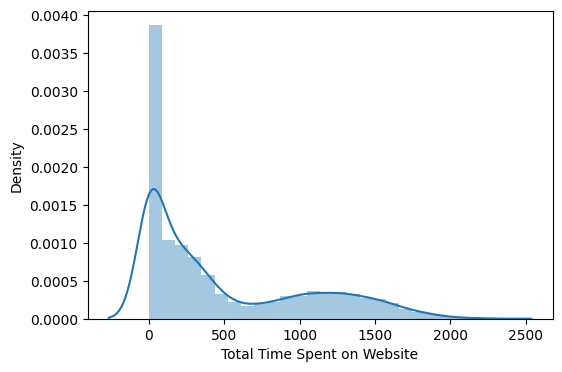

In [84]:
plt.figure(figsize=(6, 4))
sns.distplot(df['Total Time Spent on Website'])
plt.show()

In [103]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [89]:
df['Magazine'].value_counts(normalize = True) * 100
# This column only has one value
# It doesn't have the necessary variance to be conducive to predictions
# It would be wise to drop this column

array(['no'], dtype=object)

In [92]:
df.drop('Magazine', axis = 1, inplace = True)

In [96]:
df['Receive More Updates About Our Courses'].value_counts(normalize = True) * 100
# This column only has one value
# It doesn't have the necessary variance to be conducive to predictions
# It would be wise to drop this column


True

In [97]:
df.drop('Receive More Updates About Our Courses', axis = 1, inplace = True)

In [100]:
df['I agree to pay the amount through cheque'].value_counts(normalize = True) * 100
# This column only has one value
# It doesn't have the necessary variance to be conducive to predictions
# It would be wise to drop this column


array(['no'], dtype=object)

In [101]:
df.drop('I agree to pay the amount through cheque', axis = 1, inplace = True)

In [104]:
df['Get updates on DM Content'].value_counts(normalize = True) * 100
# This column only has one value
# It doesn't have the necessary variance to be conducive to predictions
# It would be wise to drop this column

array(['no'], dtype=object)

In [105]:
df.drop('Get updates on DM Content', axis = 1, inplace = True)

In [109]:
df['Do Not Email'].value_counts(normalize = True) * 100

no     92.056277
yes     7.943723
Name: Do Not Email, dtype: float64

In [110]:
df['Do Not Call'].value_counts(normalize = True) * 100

no     99.978355
yes     0.021645
Name: Do Not Call, dtype: float64

In [111]:
# This column has one value which is overwhelming 
# The essential variance needed to be informative enough for making predictions is non-existent
# It would be wise to drop this column
df.drop('Do Not Email', axis = 1, inplace = True)
df.drop('Do Not Call', axis = 1, inplace = True)

In [112]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'What matters most to you in choosing a course',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Tags',
 'Lead Quality',
 'Update me on Supply Chain Content',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [124]:
useless_columns = list()

In [75]:
df['What matters most to you in choosing a course'].value_counts(normalize = True) * 100
# Drop this column, it doesn't have the necessary amount of variance to contribute in predictions

better career prospects      99.954065
flexibility & convenience     0.030623
other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

In [125]:
useless_columns.append('What matters most to you in choosing a course')

In [114]:
df['Search'].value_counts(normalize = True) * 100

no     99.848485
yes     0.151515
Name: Search, dtype: float64

In [127]:
useless_columns.append('Search')

In [115]:
df['Newspaper Article'].value_counts(normalize = True) * 100

no     99.978355
yes     0.021645
Name: Newspaper Article, dtype: float64

In [129]:
useless_columns.append('Newspaper Article')

In [116]:
df['X Education Forums'].value_counts(normalize = True) * 100

no     99.989177
yes     0.010823
Name: X Education Forums, dtype: float64

In [130]:
useless_columns.append('X Education Forums')

In [117]:
df['Newspaper'].value_counts(normalize = True) * 100

no     99.989177
yes     0.010823
Name: Newspaper, dtype: float64

In [131]:
useless_columns.append('Newspaper')

In [119]:
df['Digital Advertisement'].value_counts(normalize = True) * 100

no     99.95671
yes     0.04329
Name: Digital Advertisement, dtype: float64

In [132]:
useless_columns.append('Digital Advertisement')

In [120]:
df['Through Recommendations'].value_counts(normalize = True) * 100

no     99.924242
yes     0.075758
Name: Through Recommendations, dtype: float64

In [133]:
useless_columns.append('Through Recommendations')

In [121]:
df['Update me on Supply Chain Content'].value_counts(normalize = True) * 100

no    100.0
Name: Update me on Supply Chain Content, dtype: float64

In [134]:
useless_columns.append('Update me on Supply Chain Content')

In [136]:
df.drop(useless_columns, axis = 1, inplace = True)

In [138]:
list(df.columns)

['Lead Origin',
 'Lead Source',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Specialization',
 'How did you hear about X Education',
 'What is your current occupation',
 'Tags',
 'Lead Quality',
 'Lead Profile',
 'City',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score',
 'A free copy of Mastering The Interview',
 'Last Notable Activity']

In [122]:
df['A free copy of Mastering The Interview'].value_counts(normalize = True) * 100

no     68.744589
yes    31.255411
Name: A free copy of Mastering The Interview, dtype: float64

In [123]:
df['Last Notable Activity'].value_counts(normalize = True) * 100

modified                        36.872294
email opened                    30.595238
sms sent                        23.506494
page visited on website          3.441558
olark chat conversation          1.980519
email link clicked               1.872294
email bounced                    0.649351
unsubscribed                     0.508658
unreachable                      0.346320
had a phone conversation         0.151515
email marked spam                0.021645
approached upfront               0.010823
resubscribed to emails           0.010823
view in browser link clicked     0.010823
form submitted on website        0.010823
email received                   0.010823
Name: Last Notable Activity, dtype: float64

In [ ]:
# TotalVisits 
plt.figure(figsize=(10, 2))
sns.distplot(df['TotalVisits'])
plt.show()
# Most of the values are in the range 0 to 20

plt.figure(figsize=(3, 3))
sns.distplot(df[df['TotalVisits'].isin(range(0,21))].TotalVisits)
plt.show()

In [ ]:
# Page Views Per Visit

df['Page Views Per Visit'].describe()
# The median of the average number of page views per visit is 2
# The average number of page views per visit do not exceed 3
# 1.48% of the values are missing
# We should impute the median for these missing values

plt.figure(figsize=(4, 4))
sns.boxplot(df['Page Views Per Visit'])
plt.show()

plt.figure(figsize=(10, 3))
sns.distplot(df['Page Views Per Visit'])
plt.show()

In [ ]:
# Last Activity

plt.figure(figsize=(8, 3))
sns.histplot(df['Last Activity'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
# Country

plt.figure(figsize=(8, 4))
(df.Country.value_counts(normalize = True, dropna = False) * 100).plot.bar() 
plt.show()